In [15]:
%pylab inline
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['trace']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [40]:
t = arange(0,1,0.025)
shift = linspace(0,pi/3,8)
y = np.zeros((len(shift),len(t)))
for i, s in enumerate(shift):
    y[i,:] = np.sin(2*pi*2*t+s) + 0.08*randn(*t.shape)
for trace in y:
    noise_idx = np.where(trace>=0)[0]
    trace[noise_idx] = 0.08*randn(*noise_idx.shape)
y = y.T

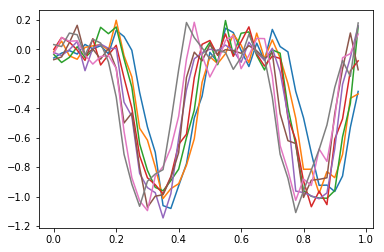

In [41]:
plot(t,y);

In [42]:
y.shape

(40, 8)

In [43]:
y = y.astype('float32')

In [44]:
y.tofile('spkDect_test.bin')

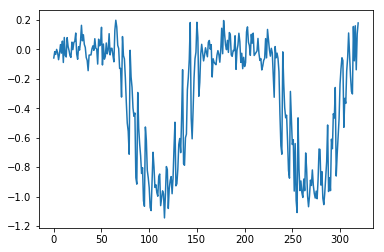

In [45]:
din  = np.fromfile('spkDect_test.bin', dtype='float32')
plot(din)

In [46]:
data = np.zeros((40,8))
k = 0
for t in range(40):
    for ch in range(8):
        data[t,ch] = din[k]
        k+=1

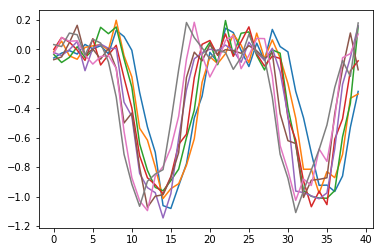

In [47]:
plot(data);

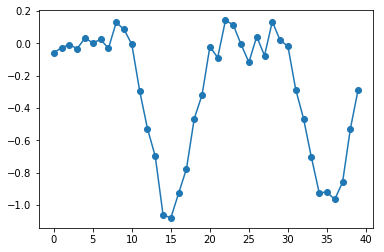

In [48]:
plot(data[:,0],'-o')

In [49]:
data

array([[ -5.89618050e-02,  -1.61055662e-02,  -3.48577201e-02,
         -7.55532063e-04,  -2.25059669e-02,  -7.06318617e-02,
         -2.86173802e-02,   3.19549888e-02],
       [ -2.59987880e-02,   5.54388724e-02,  -8.94948095e-02,
          8.02051276e-02,  -4.24189344e-02,  -5.20359650e-02,
          7.91178420e-02,   1.85682271e-02],
       [ -8.90055858e-03,  -4.47118394e-02,  -5.50064631e-02,
          4.86808792e-02,  -2.54759728e-03,   4.57713678e-02,
          5.45583479e-02,   1.10272326e-01],
       [ -3.23571600e-02,  -6.76262826e-02,   1.73191689e-02,
         -5.59580419e-03,   5.32532483e-02,   1.62779108e-01,
          5.77508733e-02,   9.87068340e-02],
       [  3.29563059e-02,   1.29898842e-02,  -5.60671501e-02,
         -7.54631981e-02,  -1.45152315e-01,  -3.94816473e-02,
         -3.91238742e-02,  -3.81574892e-02],
       [  2.88391090e-03,   2.32635438e-02,  -7.02049863e-03,
          7.18559399e-02,   7.83094484e-03,   2.15598382e-03,
         -1.00436695e-01,   6.8

[33]


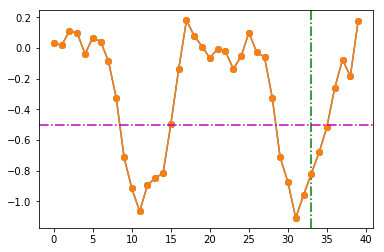

In [50]:
@interact(i=(0,7,1))
def csim_spkDect(i=0):
    din_compare  = np.fromfile('spkDect_test_compare.bin', dtype='int32')
    x = din_compare.reshape(40,8)[:,i]
    plot(x/float(2**13),'-o');
    pivital_pos = np.where(x%2==1)[0]
    print pivital_pos
    if len(pivital_pos)>0:
        for p in pivital_pos:
            axvline(p, c='g', ls='-.')
    plot(din.reshape(40,8)[:,i],'-o')
    axhline(-0.5,c='m', ls='-.')

In [223]:
max(abs(din - din_compare))

1163919359.9988873